In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, fbeta_score, accuracy_score
from sklearn.preprocessing import OneHotEncoder, Imputer, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import resample

# Preparing  the Data

In [222]:
Eclipse_JDT = pd.read_csv("./data/Eclipse_ JDT_Core_single-version-ck-oo_bugs_only.csv").drop(columns = ['classname '])
Eclipse_PDE = pd.read_csv("./data/Eclipse_PDE_UI_single-version-ck-oo_bug_only.csv").drop(columns = ['classname ','Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22'])
Equinox = pd.read_csv("./data/Equinox_Framework_single-version-ck-oo_bug_only.csv").drop(columns = ['classname ','Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22'])
Lucene = pd.read_csv("./data/Lucene_single-version-ck-oo_bug_only.csv").drop(columns = ['classname ','Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22'])
Mylyn = pd.read_csv("./data/Mylyn_single-version-ck-oo_bug_only.csv").drop(columns = ['classname ','Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22'])

In [223]:
print(Eclipse_JDT.shape)
print(Eclipse_PDE.shape)
print(Equinox.shape)
print(Lucene.shape)
print(Mylyn.shape)

(997, 19)
(1497, 19)
(324, 19)
(691, 19)
(1862, 19)


## Create a complete Dataframe with all the datasets

In [224]:
dataFrame = [Eclipse_JDT, Eclipse_PDE, Equinox, Lucene, Mylyn]
data = pd.concat(dataFrame).reset_index()
data = data.rename(columns=str.strip)
data.drop(columns = 'index', inplace = True)

In [225]:
# abdullah code
# dataFrame = [Eclipse_JDT, Eclipse_PDE, Equinox, Lucene, Mylyn]
# data = pd.concat(dataFrame).reset_index()
# data = data.rename(columns=str.strip)
# data.drop(columns = 'index', inplace = True)


# scaler = StandardScaler()
# scaledData = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
# trainx, testx, trainy, testy = train_test_split(scaledData, binaryY,test_size = 0.2, random_state = 42)

In [226]:
# data.reset_index(inplace = True)
# data = data.rename(columns=lambda x: x.strip())

In [227]:
# data.columns
# data.drop(columns = 'index', inplace = True)

## Create sperate the features from the labels

In [228]:
y = data['bugs']
df = data.copy()
data.drop(columns=["bugs", ''], inplace=True)
data.shape

(5371, 17)

#### Create Binary Series where 1 indeicate there is bug and -1 there is no bugs

In [229]:
binaryY = pd.Series(np.ones(len(y)))
binaryY.loc[y == 0] = -1
binaryY = binaryY.astype("int64")
binaryY.shape

(5371,)

#### Create Ternary Series Where 0 indicates there is no bugs and 1 for only one bug and 2 for samples with more than one bugs

In [230]:
ternaryY = pd.Series(np.zeros(len(y)))
ternaryY.loc[y == 1] = 1
ternaryY.loc[y > 1] = 2
ternaryY = ternaryY.astype("int64")
ternaryY.shape

(5371,)

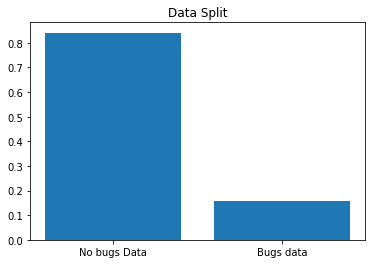

84.12% of the samples has no bugs (4518 samples out of 5371)
15.88% of the samples has bugs (853 samples out of 5371)


In [231]:
dist = sum(binaryY == -1)/binaryY.shape[0]
plt.bar([1,2],[dist,1-dist],)
plt.title('Data Split')
plt.xticks([1,2], ['No bugs Data','Bugs data']);
plt.show()

print("%.2f%% of the samples has no bugs (%d samples out of %d)"%(dist*100, sum(binaryY == -1), len(binaryY)))
print("%.2f%% of the samples has bugs (%d samples out of %d)"%((1-dist)*100, sum(binaryY == 1), len(binaryY)))

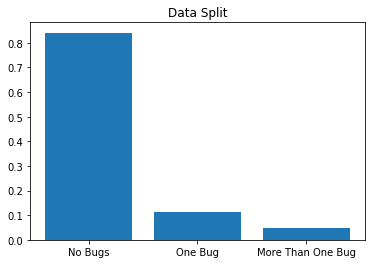

84.12% of the samples has no bugs (4518 samples out of 5371)
11.13% of the samples has one bug (598 samples out of 5371)
4.75% of the samples has more than one bug (255 samples out of 5371)


In [232]:
class_0 = sum(ternaryY == 0) / len(ternaryY)
class_1 = sum(ternaryY == 1) / len(ternaryY)
class_2 = sum(ternaryY > 1) / len(ternaryY)

plt.bar([1,2,3],[class_0,class_1,class_2],)
plt.title('Data Split')
plt.xticks([1,2,3], ['No Bugs','One Bug','More Than One Bug']);
plt.show()
print("%.2f%% of the samples has no bugs (%d samples out of %d)"%(class_0*100, sum(ternaryY == 0), len(ternaryY)))
print("%.2f%% of the samples has one bug (%d samples out of %d)"%(class_1*100, sum(ternaryY == 1), len(ternaryY)))
print("%.2f%% of the samples has more than one bug (%d samples out of %d)"%(class_2*100, sum(ternaryY > 1), len(ternaryY)))

In [233]:
# y = data['bugs']
# data.drop(columns=["bugs"], inplace=True)
# #data.drop(index=23, inplace=True)
# data.drop(data.columns[len(data.columns) - 1], axis=1, inplace = True)

In [234]:
df.head()

,cbo,dit,fanIn,fanOut,lcom,noc,numberOfAttributes,numberOfAttributesInherited,numberOfLinesOfCode,numberOfMethods,numberOfMethodsInherited,numberOfPrivateAttributes,numberOfPrivateMethods,numberOfPublicAttributes,numberOfPublicMethods,rfc,wmc,bugs,
0,9,2,1,9,15,0,1,8,122,6,19,0,0,1,5,34,20,0,
1,1,1,1,0,0,0,2,0,4,1,8,0,0,2,1,1,1,0,
2,114,1,102,18,190,6,131,249,484,20,8,0,1,3,19,156,176,1,
3,5,6,1,4,10,0,0,61,33,5,207,0,0,0,4,18,12,0,
4,23,2,1,22,820,0,7,416,673,41,8,0,2,7,1,174,115,0,


In [235]:
data.head()

,cbo,dit,fanIn,fanOut,lcom,noc,numberOfAttributes,numberOfAttributesInherited,numberOfLinesOfCode,numberOfMethods,numberOfMethodsInherited,numberOfPrivateAttributes,numberOfPrivateMethods,numberOfPublicAttributes,numberOfPublicMethods,rfc,wmc
0,9,2,1,9,15,0,1,8,122,6,19,0,0,1,5,34,20
1,1,1,1,0,0,0,2,0,4,1,8,0,0,2,1,1,1
2,114,1,102,18,190,6,131,249,484,20,8,0,1,3,19,156,176
3,5,6,1,4,10,0,0,61,33,5,207,0,0,0,4,18,12
4,23,2,1,22,820,0,7,416,673,41,8,0,2,7,1,174,115


In [236]:
data.tail()

,cbo,dit,fanIn,fanOut,lcom,noc,numberOfAttributes,numberOfAttributesInherited,numberOfLinesOfCode,numberOfMethods,numberOfMethodsInherited,numberOfPrivateAttributes,numberOfPrivateMethods,numberOfPublicAttributes,numberOfPublicMethods,rfc,wmc
5366,3,3,1,2,10,0,1,0,35,5,24,1,0,0,2,18,9
5367,14,1,14,0,1,8,1,0,0,2,9,0,0,0,2,2,0
5368,9,1,3,6,55,2,4,0,63,11,9,0,0,0,7,32,18
5369,11,2,3,8,105,2,5,0,106,15,27,3,0,0,14,36,37
5370,13,1,8,6,105,0,6,0,91,15,9,6,0,0,15,52,27


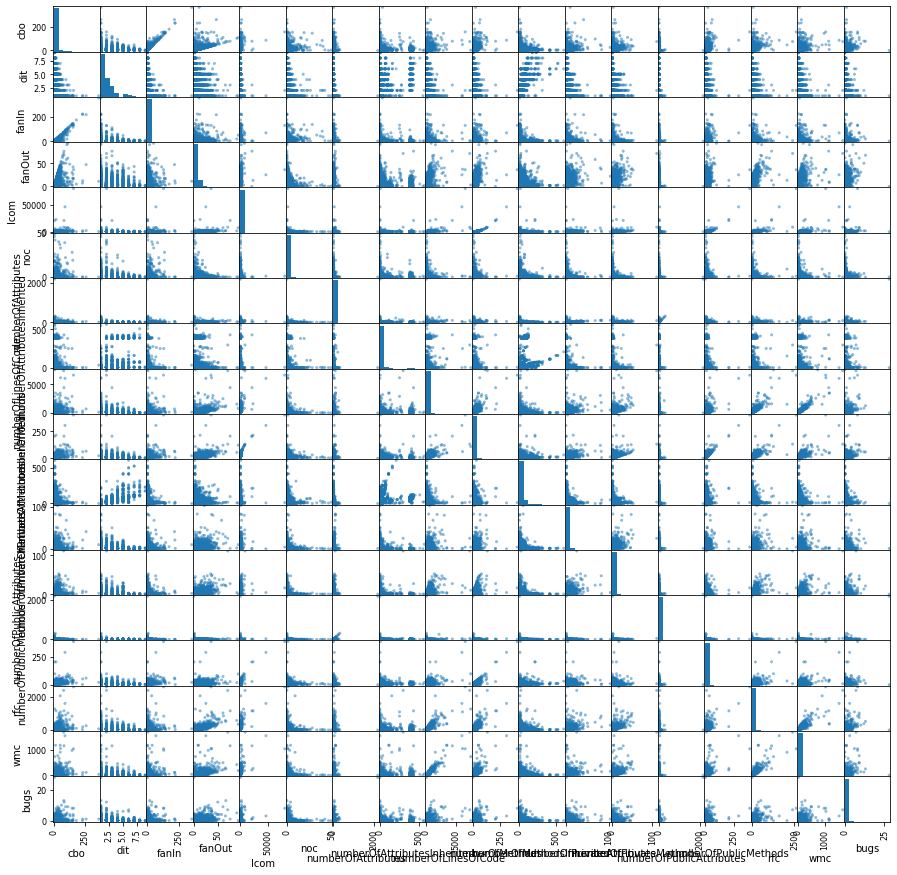

In [237]:
pd.plotting.scatter_matrix(df, figsize=(15,15));

## Graph to show the correlation between the features and the label("Bugs")

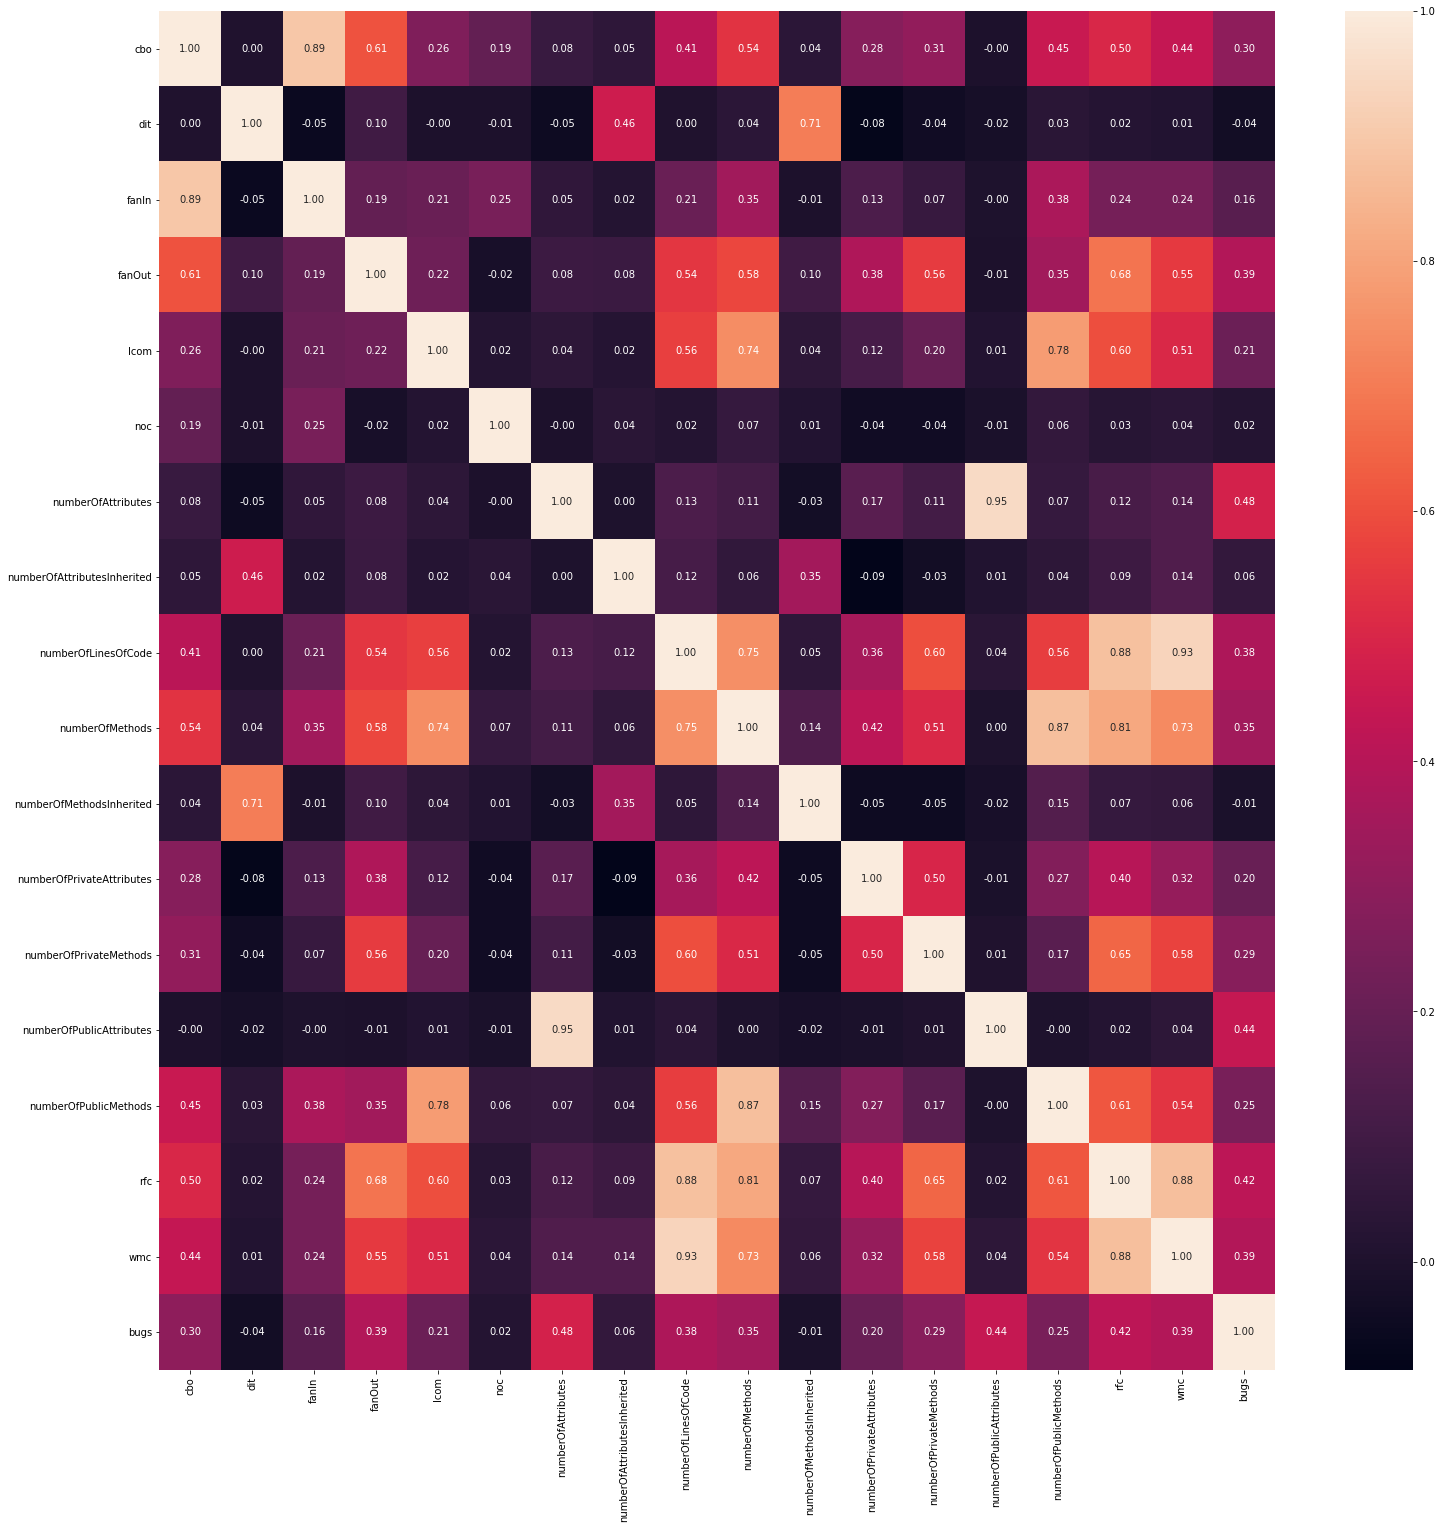

In [238]:
plt.subplots(figsize=(25,25))
sns.heatmap(df.corr(), annot = True, fmt="0.2f");

In [239]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5371 entries, 0 to 5370
Data columns (total 17 columns):
cbo                            5371 non-null int64
dit                            5371 non-null int64
fanIn                          5371 non-null int64
fanOut                         5371 non-null int64
lcom                           5371 non-null int64
noc                            5371 non-null int64
numberOfAttributes             5371 non-null int64
numberOfAttributesInherited    5371 non-null int64
numberOfLinesOfCode            5371 non-null int64
numberOfMethods                5371 non-null int64
numberOfMethodsInherited       5371 non-null int64
numberOfPrivateAttributes      5371 non-null int64
numberOfPrivateMethods         5371 non-null int64
numberOfPublicAttributes       5371 non-null int64
numberOfPublicMethods          5371 non-null int64
rfc                            5371 non-null int64
wmc                            5371 non-null int64
dtypes: int64(17)
memory u

In [240]:
data.describe()

,cbo,dit,fanIn,fanOut,lcom,noc,numberOfAttributes,numberOfAttributesInherited,numberOfLinesOfCode,numberOfMethods,numberOfMethodsInherited,numberOfPrivateAttributes,numberOfPrivateMethods,numberOfPublicAttributes,numberOfPublicMethods,rfc,wmc
count,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000,5371.000000
mean,9.650717,1.948985,4.077825,5.808229,131.440328,0.548687,5.648110,20.607522,119.126233,9.465649,25.673245,2.701545,1.515733,1.588903,6.271272,47.397133,28.291380
std,15.430910,1.339559,12.763334,7.413065,1419.297581,2.320663,32.421878,75.447749,305.121926,13.519683,40.646291,5.005445,4.259624,30.836387,10.583760,100.978959,69.140371
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,1.000000,1.000000,3.000000,0.000000,1.000000,0.000000,18.000000,3.000000,7.000000,0.000000,0.000000,0.000000,2.000000,8.000000,4.000000
50%,6.000000,1.000000,1.000000,3.000000,15.000000,0.000000,2.000000,0.000000,47.000000,6.000000,12.000000,1.000000,0.000000,0.000000,4.000000,21.000000,11.000000
75%,11.000000,2.000000,3.000000,8.000000,55.000000,0.000000,5.000000,2.000000,115.000000,11.000000,30.000000,3.000000,1.000000,0.000000,7.000000,51.000000,27.000000
max,362.000000,9.000000,355.000000,93.000000,81003.000000,49.000000,2169.000000,563.000000,7509.000000,403.000000,602.000000,103.000000,111.000000,2168.000000,387.000000,2603.000000,1680.000000


- From the table above all the features count is equal to the number of samples which indicates that we don't have any missing data 
- From the mean row there is a huge different between the data for example the mean for "noc" is 0.549 and "numberOfLinesOfCode" is 119.126 so the data need to be scaled and we can ensure that be looking at the min and max row and see the different between the features

In [241]:
data.isnull().sum()

cbo                            0
dit                            0
fanIn                          0
fanOut                         0
lcom                           0
noc                            0
numberOfAttributes             0
numberOfAttributesInherited    0
numberOfLinesOfCode            0
numberOfMethods                0
numberOfMethodsInherited       0
numberOfPrivateAttributes      0
numberOfPrivateMethods         0
numberOfPublicAttributes       0
numberOfPublicMethods          0
rfc                            0
wmc                            0
dtype: int64

<font color = "red">That a good thing there is no null values </font>

<font color = "red"><b> The data is highly imbalanced if we randomly classified the sample with only one bug we will get 84.1% accuracy</b></font>

In [242]:
scaler = StandardScaler()
scaledData = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [243]:
scaledData.head()

,cbo,dit,fanIn,fanOut,lcom,noc,numberOfAttributes,numberOfAttributesInherited,numberOfLinesOfCode,numberOfMethods,numberOfMethodsInherited,numberOfPrivateAttributes,numberOfPrivateMethods,numberOfPublicAttributes,numberOfPublicMethods,rfc,wmc
0,-0.042174,0.038087,-0.241168,0.430600,-0.082048,-0.236458,-0.143377,-0.167118,0.009419,-0.256365,-0.164194,-0.539772,-0.355870,-0.019099,-0.120126,-0.132685,-0.119932
1,-0.560662,-0.708497,-0.241168,-0.783585,-0.092618,-0.236458,-0.112530,-0.273162,-0.377347,-0.626230,-0.434846,-0.539772,-0.355870,0.013333,-0.498099,-0.459516,-0.394761
2,6.762984,-0.708497,7.672861,1.644786,0.041263,2.349251,3.866635,3.027443,1.195941,0.779259,-0.434846,-0.539772,-0.121086,0.045765,1.202778,1.075600,2.136557
3,-0.301418,3.024423,-0.241168,-0.243947,-0.085572,-0.236458,-0.174223,0.535420,-0.282295,-0.330338,4.461505,-0.539772,-0.355870,-0.051532,-0.214620,-0.291148,-0.235650
4,0.865181,0.038087,-0.241168,2.184424,0.485186,-0.236458,0.041701,5.241101,1.815423,2.332694,-0.434846,-0.539772,0.113698,0.175494,-0.498099,1.253872,1.254212


In [244]:
scaledData.describe()

,cbo,dit,fanIn,fanOut,lcom,noc,numberOfAttributes,numberOfAttributesInherited,numberOfLinesOfCode,numberOfMethods,numberOfMethodsInherited,numberOfPrivateAttributes,numberOfPrivateMethods,numberOfPublicAttributes,numberOfPublicMethods,rfc,wmc
count,5.371000e+03,5.371000e+03,5.371000e+03,5.371000e+03,5.371000e+03,5.371000e+03,5.371000e+03,5.371000e+03,5.371000e+03,5.371000e+03,5.371000e+03,5.371000e+03,5.371000e+03,5.371000e+03,5.371000e+03,5.371000e+03,5.371000e+03
mean,-4.789493e-15,1.600015e-15,7.393287e-16,-1.393176e-15,-9.637712e-17,1.079723e-15,1.445017e-16,-1.474765e-14,9.604638e-17,-7.102451e-17,8.653683e-16,1.226847e-15,1.312093e-15,-1.219248e-15,-1.123721e-15,2.620127e-16,1.542479e-15
std,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00,1.000093e+00
min,-6.254729e-01,-7.084972e-01,-3.195251e-01,-7.835855e-01,-9.261804e-02,-2.364576e-01,-1.742230e-01,-2.731618e-01,-3.904581e-01,-7.002036e-01,-6.316846e-01,-5.397715e-01,-3.558703e-01,-5.153170e-02,-5.925924e-01,-4.694200e-01,-4.092257e-01
25%,-4.310398e-01,-7.084972e-01,-2.411683e-01,-6.486760e-01,-9.050413e-02,-2.364576e-01,-1.433767e-01,-2.731618e-01,-3.314598e-01,-4.782842e-01,-4.594511e-01,-5.397715e-01,-3.558703e-01,-5.153170e-02,-4.036060e-01,-3.901882e-01,-3.513670e-01
50%,-2.366067e-01,-7.084972e-01,-2.411683e-01,-3.788569e-01,-8.204845e-02,-2.364576e-01,-1.125305e-01,-2.731618e-01,-2.364070e-01,-2.563649e-01,-3.364272e-01,-3.399705e-01,-3.558703e-01,-5.153170e-02,-2.146197e-01,-2.614365e-01,-2.501142e-01
75%,8.744843e-02,3.808677e-02,-8.445487e-02,2.956907e-01,-5.386287e-02,-2.364576e-01,-1.999176e-02,-2.466509e-01,-1.352449e-02,1.135007e-01,1.064589e-01,5.963155e-02,-1.210860e-01,-5.153170e-02,6.885986e-02,3.568271e-02,-1.867939e-02
max,2.283612e+01,5.264175e+00,2.749711e+01,1.176300e+01,5.698529e+01,2.088016e+01,6.673128e+01,7.189651e+00,2.422167e+01,2.911096e+01,1.418039e+01,2.003973e+01,2.570519e+01,7.026157e+01,3.597627e+01,2.531063e+01,2.389143e+01


In [245]:
trainx, testx, trainy, testy = train_test_split(scaledData, binaryY,test_size = 0.30, random_state = 42)

In [246]:
print(sum(binaryY == -1))
print(sum(binaryY ==  1))

4518
853


# <b>Impementing binary classifiers</b>

# Ensemble

### 1. Decision tree

In [247]:
parm_grid_tree = {'max_depth': [3, 5, 7, 9, 15, 21],  
                  'min_samples_split': [6, 14, 22, 29, 38]}  
TreeDecision_grid = GridSearchCV(DecisionTreeClassifier(), parm_grid_tree)
TreeDecision_grid.fit(trainx, trainy)

D:\MySoftwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, 5, 7, 9, 15, 21],
                         'min_samples_split': [6, 14, 22, 29, 38]},
   

In [248]:
TreeDecision_grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=29,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [249]:
TreeDecision_grid.best_score_

0.8488959829741952

In [250]:
predTree = TreeDecision_grid.predict(testx)
np.sum((predTree == testy) / len(testy))

0.8449131513647641

## 2. Bagging

In [251]:
parm_grid_bagging = {'base_estimator': [DecisionTreeClassifier()],  
                  'n_estimators': [50, 100, 250, 500, 100]} 
bagging_grid = GridSearchCV(BaggingClassifier(), parm_grid_bagging)
bagging_grid.fit(trainx, trainy)

D:\MySoftwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=False, random_state=None,
                                         verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'base_estimator': [DecisionTreeClassifier(class_we...
                                                                   criterion='gini',
                                                                   max_depth=None,
                                                                   max_features=None,
                                                                   max_leaf_nodes=None,
                                            

In [252]:
bagging_grid.best_estimator_

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
    

In [253]:
bagging_grid.best_score_

0.8568768289438681

In [254]:
predBagging = bagging_grid.predict(testx)
np.sum((predBagging == testy) / len(testy))

0.8591811414392058

## 3. AdaBoost

In [255]:
parm_grid_AdaBoost = {'base_estimator': [DecisionTreeClassifier()],  
                  'n_estimators': [20, 100, 250, 500, 1000, 1500]} #[20, 50, 100, 250, 500, 1000]
AdaBoost_grid = GridSearchCV(AdaBoostClassifier(), parm_grid_AdaBoost)
AdaBoost_grid.fit(trainx, trainy)

D:\MySoftwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=None,
             param_grid={'base_estimator': [DecisionTreeClassifier(class_weight=None,
                                                                   criterion='gini',
                                                                   max_depth=None,
                                                                   max_features=None,
                                                                   max_leaf_nodes=None,
                                                                   min_impurity_decrease=0.0,
                                                                   min_impurity_split=None,
                         

In [256]:
AdaBoost_grid.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                          

In [257]:
AdaBoost_grid.best_score_

0.8422452779994679

In [258]:
predBoost = AdaBoost_grid.predict(testx)
np.sum((predBoost == testy) / len(testy))

0.8405707196029775

## 4. Random Forest

In [259]:
parm_grid_rf = {'n_estimators': [50, 100, 250],
               'max_depth' : [10, 50, 100, 200],
               'min_samples_split' : [20, 50, 100, 200]} #[20, 50, 100, 250, 500, 1000]
rf_grid = GridSearchCV(RandomForestClassifier(), parm_grid_rf)
rf_grid.fit(trainx, trainy)

D:\MySoftwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [260]:
rf_grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [261]:
rf_grid.best_score_

0.8547486033519553

In [262]:
predRF = rf_grid.predict(testx)
np.sum((predRF == testy) / len(testy))

0.8591811414392059

# Gaussian

In [263]:
Gtrainx, Gtestx, Gtrainy, Gtesty = train_test_split(data, binaryY, random_state = 42)

In [264]:
clf = GaussianNB()
clf.fit(Gtrainx, Gtrainy)

GaussianNB(priors=None, var_smoothing=1e-09)

In [265]:
ypred = clf.predict(Gtestx)
(sum(ypred == Gtesty) / len(ypred))

0.8451228592702904

# Multiple Classifiers

In [266]:
trainxT, testxT, trainyT, testyT = train_test_split(scaledData, ternaryY,test_size = 0.30, random_state = 42)

## Decision Tree

In [267]:
parm_grid_tree = {'max_depth': [3, 5, 7, 9, 15, 21],  
                  'min_samples_split': [6, 14, 22, 29, 38]}  
TreeDecision_grid = GridSearchCV(DecisionTreeClassifier(), parm_grid_tree)
TreeDecision_grid.fit(trainxT, trainyT)
TreeDecision_grid.best_estimator_

D:\MySoftwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=38,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [268]:
TreeDecision_grid.best_score_

0.8427773343974462

In [269]:
predTreeT = TreeDecision_grid.predict(testxT)
np.sum((predTreeT == testyT) / len(testyT))

0.8399503722084365

## AdaBoost

In [270]:
parm_grid_AdaBoost = {'base_estimator': [DecisionTreeClassifier()],  
                  'n_estimators': [20, 100, 250, 500, 1000, 1500]} #[20, 50, 100, 250, 500, 1000]
AdaBoost_grid = GridSearchCV(AdaBoostClassifier(), parm_grid_AdaBoost)
AdaBoost_grid.fit(trainxT, trainyT)
AdaBoost_grid.best_estimator_

D:\MySoftwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                          

In [271]:
AdaBoost_grid.best_score_

0.8486299547752062

In [272]:
predBoostT = AdaBoost_grid.predict(testxT)
np.sum((predBoostT == testyT) / len(testyT))

0.8461538461538459

## Random Forest

In [273]:
parm_grid_rf = {'n_estimators': [50, 100, 250],
               'max_depth' : [10, 50, 100, 200],
               'min_samples_split' : [20, 50, 100, 200]} #[20, 50, 100, 250, 500, 1000]
rf_grid = GridSearchCV(RandomForestClassifier(), parm_grid_rf)
rf_grid.fit(trainxT, trainyT)
rf_grid.best_estimator_

D:\MySoftwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=50, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [274]:
rf_grid.best_score_

0.8504921521681298

In [275]:
predRFT = rf_grid.predict(testxT)
np.sum((predRFT == testyT) / len(testyT))

0.8442928039702231

<font color="red">All the above was just trying different algorithm on the normal dataset without any data prepration</font>

# Principal Component Analysis (PCA)

In [276]:
pca = PCA()
pca.fit(scaledData)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [277]:
pca.explained_variance_ratio_

array([3.58186692e-01, 1.23836595e-01, 1.12755472e-01, 9.74124324e-02,
       8.05449292e-02, 5.39381925e-02, 4.68301256e-02, 3.71311464e-02,
       2.79745472e-02, 2.10976526e-02, 1.62328034e-02, 1.05400648e-02,
       5.34278332e-03, 3.66300808e-03, 2.73601844e-03, 1.69204152e-03,
       8.54946388e-05])

Text(0, 0.5, 'Variance')

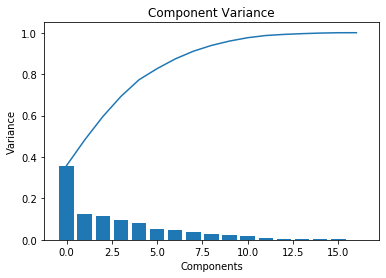

In [278]:
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.plot(range(len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_), "-")
plt.title("Component Variance")
plt.xlabel("Components")
plt.ylabel("Variance")

In [279]:
pca1 = PCA(n_components=10)
pcaData = pca1.fit_transform(data)

In [280]:
trainx, testx, trainy, testy = train_test_split(pcaData, binaryY, random_state = 42)
parm_grid_bagging = {'base_estimator': [DecisionTreeClassifier()],  
                  'n_estimators': [50, 100, 250, 500, 100]} 
bagging_grid = GridSearchCV(BaggingClassifier(), parm_grid_bagging)
bagging_grid.fit(trainx, trainy)
bagging_grid.best_estimator_
bagging_grid.best_score_
predBagging = bagging_grid.predict(testx)
np.sum((predBagging == testy) / len(testy))

D:\MySoftwares\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8600148920327624

## Try to solve the imbalanced data samples

### Oversample

In [318]:
def F_Beta_Score(trueY, predY):
    betas = [0.001, 0.01, 0.5, 1, 5, 10]
    
    for b in betas:
        score = fbeta_score(trueY, predY, average = "macro", beta = b)
        print("beta = %f, score = %.2f%%"%(b, score*100))

In [319]:
def RandomForest(trainx, trainy, valx, valy, testx, testy):
    print("Random-Forest Classifier:")
    hyperParms = {'n_estimators': [2, 5, 10, 15, 20, 50, 100],
               'max_depth' : [200, 300, 500, 750, 1000, 1500, 2000],
               'min_samples_split' : [2, 5, 10, 15, 20, 50, 100]}
    bestAccuracy = 0
    for nEstimators in hyperParms['n_estimators']:
        for maxDepth in hyperParms['max_depth']:
            for minSamples in hyperParms['min_samples_split']:
                model = RandomForestClassifier(n_estimators = nEstimators, max_depth = maxDepth, min_samples_split = minSamples)
                model.fit(trainx, trainy)
                predy = model.predict(valx)
                accuracy = accuracy_score(valy, predy)
                if(accuracy > bestAccuracy):
                    bestAccuracy = accuracy
                    bestModel = RandomForestClassifier(n_estimators = nEstimators, max_depth = maxDepth, min_samples_split = minSamples)
    
    bestModel.fit(trainx, trainy)
    print("Best estimator parameters:\n",bestModel.get_params())
    predy = bestModel.predict(trainx)
    print("_______________________________________________________________________________")
    print("Accuracy of the train set = %.3lf%%"%(accuracy_score(trainy, predy) * 100))
    print("Accuracy of the validation set = %.3lf%%"%(bestAccuracy * 100))
    predy = bestModel.predict(testx)
    print("Accuracy of the test set = %.3f%%"%(accuracy_score(testy, predy) * 100))
    print("_______________________________________________________________________________")
    print("Results for F_Beta_Score:")
    F_Beta_Score(testy, predy)

In [320]:
def AdaBoost(trainx, trainy, valx, valy, testx, testy):
    print("AdaBoost Classifier:")
    hyperParms = {'n_estimators': [2, 5, 10, 15, 20, 50, 100, 250, 500, 1000]}
    bestAccuracy = 0
    for nEstimators in hyperParms['n_estimators']:
        model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(), n_estimators = nEstimators)
        model.fit(trainx, trainy)
        predy = model.predict(valx)
        accuracy = accuracy_score(valy, predy)
        if(accuracy > bestAccuracy):
            bestAccuracy = accuracy
            bestModel = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(), n_estimators = nEstimators)

    bestModel.fit(trainx, trainy)
    print("Best estimator parameters:\n",bestModel.get_params())
    predy = bestModel.predict(trainx)
    print("_______________________________________________________________________________")
    print("Accuracy of the train set = %.3lf%%"%(accuracy_score(trainy, predy) * 100))
    print("Accuracy of the validation set = %.3lf%%"%(bestAccuracy * 100))
    predy = bestModel.predict(testx)
    print("Accuracy of the test set = %.3f%%"%(accuracy_score(testy, predy) * 100))
    print("_______________________________________________________________________________")
    print("Results for F_Beta_Score:")
    F_Beta_Score(testy, predy)

In [321]:
def DecisionTree(trainx, trainy, valx, valy, testx, testy):
    print("DecisionTree Classifier:")
    hyperParms = {'max_depth' : [200, 300, 500, 750, 1000, 1500, 2000],
               'min_samples_split' : [2, 5, 10, 15, 20, 50, 100]}
    bestAccuracy = 0
    for maxDepth in hyperParms['max_depth']:
        for minSamples in hyperParms['min_samples_split']:
            model = DecisionTreeClassifier(max_depth = maxDepth, min_samples_split = minSamples)
            model.fit(trainx, trainy)
            predy = model.predict(valx)
            accuracy = accuracy_score(valy, predy)
            if(accuracy > bestAccuracy):
                bestAccuracy = accuracy
                bestModel = DecisionTreeClassifier(max_depth = maxDepth, min_samples_split = minSamples)
    
    bestModel.fit(trainx, trainy)
    print("Best estimator parameters:\n",bestModel.get_params())
    predy = bestModel.predict(trainx)
    print("_______________________________________________________________________________")
    print("Accuracy of the train set = %.3lf%%"%(accuracy_score(trainy, predy) * 100))
    print("Accuracy of the validation set = %.3lf%%"%(bestAccuracy * 100))
    predy = bestModel.predict(testx)
    print("Accuracy of the test set = %.3f%%"%(accuracy_score(testy, predy) * 100))
    print("_______________________________________________________________________________")
    print("Results for F_Beta_Score:")
    F_Beta_Score(testy, predy)

In [322]:
def Sampling(trainx, trainy, nSamples, overSampling = True):
    Xdata = pd.concat([trainx, trainy], axis = 1)
    bug = Xdata[trainy == 1]
    NoBugs = Xdata[trainy == -1]
    
    if(overSampling):
        bugSampled = resample(bug, replace = True, n_samples=int(nSamples), random_state = 42)
        SampledData = pd.concat([NoBugs, bugSampled])
    else:
        noBugSampled = resample(NoBugs, replace = True, n_samples=int(nSamples), random_state = 42)
        SampledData = pd.concat([noBugSampled, bug])
    
    
    print(SampledData[0].value_counts())
    
    SampledX = SampledData.drop(columns=0, axis = 1)
    SampledY = SampledData[0]
    
    return SampledX, SampledY
    

In [323]:
trainx, testx, trainy, testy = train_test_split(scaledData, binaryY, test_size = 0.30, random_state = 42)
valx, testx, valy, testy = train_test_split(testx, testy, test_size = 0.50, random_state = 42)

In [324]:
print(len(trainy))
print()
print(sum(trainy == -1))
print(sum(trainy == 1))
print()
print(sum(valy == -1))
print(sum(valy == 1))
print()
print(sum(testy == -1))
print(sum(testy == 1))

3759

3163
596

668
138

687
119


## Results for Binary Class

### Without UnderSampling or OverSampling

In [325]:
RandomForest(trainx, trainy, valx, valy, testx, testy)

Random-Forest Classifier:
Best estimator parameters:
 {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2000, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
_______________________________________________________________________________
Accuracy of the train set = 92.924%
Accuracy of the validation set = 85.732%
Accuracy of the test set = 86.973%
_______________________________________________________________________________
Results for F_Beta_Score:
beta = 0.001000, score = 77.05%
beta = 0.010000, score = 77.04%
beta = 0.500000, score = 69.56%
beta = 1.000000, score = 64.17%
beta = 5.000000, score = 61.19%
beta = 10.000000, score = 61.12%


In [326]:
AdaBoost(trainx, trainy, valx, valy, testx, testy)

AdaBoost Classifier:
Best estimator parameters:
 {'algorithm': 'SAMME.R', 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': None, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__presort': False, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitt

In [327]:
DecisionTree(trainx, trainy, valx, valy, testx, testy)

DecisionTree Classifier:
Best estimator parameters:
 {'class_weight': None, 'criterion': 'gini', 'max_depth': 200, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 100, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}
_______________________________________________________________________________
Accuracy of the train set = 87.257%
Accuracy of the validation set = 83.871%
Accuracy of the test set = 84.615%
_______________________________________________________________________________
Results for F_Beta_Score:
beta = 0.001000, score = 66.84%
beta = 0.010000, score = 66.84%
beta = 0.500000, score = 63.87%
beta = 1.000000, score = 61.23%
beta = 5.000000, score = 59.43%
beta = 10.000000, score = 59.38%


### Results with OverSmapling

In [328]:
xxx, yyy = Sampling(trainx, trainy, sum(trainy == -1))

-1    3163
 1    3163
Name: 0, dtype: int64


In [329]:
RandomForest(xxx, yyy, valx, valy, testx, testy)

Random-Forest Classifier:
Best estimator parameters:
 {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 750, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
_______________________________________________________________________________
Accuracy of the train set = 99.810%
Accuracy of the validation set = 85.236%
Accuracy of the test set = 85.856%
_______________________________________________________________________________
Results for F_Beta_Score:
beta = 0.001000, score = 71.26%
beta = 0.010000, score = 71.26%
beta = 0.500000, score = 69.01%
beta = 1.000000, score = 66.60%
beta = 5.000000, score = 64.39%
beta = 10.000000, score = 64.29%


In [330]:
AdaBoost(xxx, yyy, valx, valy, testx, testy)

AdaBoost Classifier:
Best estimator parameters:
 {'algorithm': 'SAMME.R', 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': None, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__presort': False, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitt

In [331]:
DecisionTree(xxx, yyy, valx, valy, testx, testy)

DecisionTree Classifier:
Best estimator parameters:
 {'class_weight': None, 'criterion': 'gini', 'max_depth': 1000, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}
_______________________________________________________________________________
Accuracy of the train set = 99.810%
Accuracy of the validation set = 79.777%
Accuracy of the test set = 80.273%
_______________________________________________________________________________
Results for F_Beta_Score:
beta = 0.001000, score = 60.30%
beta = 0.010000, score = 60.30%
beta = 0.500000, score = 60.23%
beta = 1.000000, score = 60.11%
beta = 5.000000, score = 59.95%
beta = 10.000000, score = 59.95%


### Results with UnderSampling

In [332]:
xxx, yyy = Sampling(trainx, trainy, sum(trainy == 1), overSampling=False)

 1    596
-1    596
Name: 0, dtype: int64


In [333]:
RandomForest(xxx, yyy, valx, valy, testx, testy)

Random-Forest Classifier:
Best estimator parameters:
 {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 300, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 2, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
_______________________________________________________________________________
Accuracy of the train set = 86.493%
Accuracy of the validation set = 74.566%
Accuracy of the test set = 73.945%
_______________________________________________________________________________
Results for F_Beta_Score:
beta = 0.001000, score = 58.57%
beta = 0.010000, score = 58.57%
beta = 0.500000, score = 58.60%
beta = 1.000000, score = 59.25%
beta = 5.000000, score = 62.39%
beta = 10.000000, score = 62.72%


In [334]:
AdaBoost(xxx, yyy, valx, valy, testx, testy)

AdaBoost Classifier:
Best estimator parameters:
 {'algorithm': 'SAMME.R', 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': None, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__presort': False, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitt

In [335]:
DecisionTree(xxx, yyy, valx, valy, testx, testy)

DecisionTree Classifier:
Best estimator parameters:
 {'class_weight': None, 'criterion': 'gini', 'max_depth': 200, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 100, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}
_______________________________________________________________________________
Accuracy of the train set = 73.238%
Accuracy of the validation set = 73.077%
Accuracy of the test set = 72.953%
_______________________________________________________________________________
Results for F_Beta_Score:
beta = 0.001000, score = 60.48%
beta = 0.010000, score = 60.48%
beta = 0.500000, score = 60.25%
beta = 1.000000, score = 61.02%
beta = 5.000000, score = 66.59%
beta = 10.000000, score = 67.23%


In [336]:
def SamplingForTernary(trainx, trainy, nSamples, overSampling = True):
    Xdata = pd.concat([trainx, trainy], axis = 1)
    noBugs = Xdata[trainy == 0]
    oneBug = Xdata[trainy == 1]
    MoreThanOneBug = Xdata[trainy == 2]
    
    if(overSampling):
        bugSampled = resample(oneBug, replace = True, n_samples=int(nSamples), random_state = 42)
        moreBugsSmapled = resample(MoreThanOneBug, replace = True, n_samples=int(nSamples), random_state = 42)
        SampledData = pd.concat([noBugs, bugSampled, moreBugsSmapled])
    else:
        noBugsSmapled = resample(noBugs, replace = True, n_samples=int(nSamples), random_state = 42)
        oneBugSmapled = resample(oneBug, replace = True, n_samples=int(nSamples), random_state = 42)
        SampledData = pd.concat([noBugsSmapled, oneBugSmapled, MoreThanOneBug])
    
    
    print(SampledData[0].value_counts())
    
    SampledX = SampledData.drop(columns=0, axis = 1)
    SampledY = SampledData[0]
    
    return SampledX, SampledY

In [337]:
trainx, testx, trainy, testy = train_test_split(scaledData, ternaryY, test_size = 0.30, random_state = 42)
valx, testx, valy, testy = train_test_split(testx, testy, test_size = 0.50, random_state = 42)

In [338]:
print(len(trainy))
print()
print(sum(trainy == 0))
print(sum(trainy == 1))
print(sum(trainy == 2))
print()
print(sum(valy == 0))
print(sum(valy == 1))
print(sum(valy == 2))
print()
print(sum(testy == 0))
print(sum(testy == 1))
print(sum(testy == 2))

3759

3163
421
175

668
97
41

687
80
39


## Results for Multiple Classes

### Without UnderSampling or OverSampling

In [339]:
RandomForest(trainx, trainy, valx, valy, testx, testy)

Random-Forest Classifier:
Best estimator parameters:
 {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2000, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
_______________________________________________________________________________
Accuracy of the train set = 96.276%
Accuracy of the validation set = 84.119%
Accuracy of the test set = 85.980%
_______________________________________________________________________________
Results for F_Beta_Score:
beta = 0.001000, score = 62.89%
beta = 0.010000, score = 62.87%
beta = 0.500000, score = 47.64%
beta = 1.000000, score = 41.89%
beta = 5.000000, score = 39.89%
beta = 10.000000, score = 39.87%


In [340]:
AdaBoost(trainx, trainy, valx, valy, testx, testy)

AdaBoost Classifier:
Best estimator parameters:
 {'algorithm': 'SAMME.R', 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': None, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__presort': False, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitt

In [341]:
DecisionTree(trainx, trainy, valx, valy, testx, testy)

DecisionTree Classifier:
Best estimator parameters:
 {'class_weight': None, 'criterion': 'gini', 'max_depth': 300, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 100, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}
_______________________________________________________________________________
Accuracy of the train set = 86.034%
Accuracy of the validation set = 82.258%
Accuracy of the test set = 83.499%
_______________________________________________________________________________
Results for F_Beta_Score:
beta = 0.001000, score = 42.81%
beta = 0.010000, score = 42.81%
beta = 0.500000, score = 40.15%
beta = 1.000000, score = 38.32%
beta = 5.000000, score = 37.58%
beta = 10.000000, score = 37.58%


## Results With UnderSampling

In [342]:
xxx, yyy = SamplingForTernary(trainx, trainy, sum(trainy == 2), overSampling=False)

2    175
1    175
0    175
Name: 0, dtype: int64


In [343]:
RandomForest(xxx, yyy, valx, valy, testx, testy)

Random-Forest Classifier:
Best estimator parameters:
 {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1000, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 100, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
_______________________________________________________________________________
Accuracy of the train set = 58.857%
Accuracy of the validation set = 68.486%
Accuracy of the test set = 68.486%
_______________________________________________________________________________
Results for F_Beta_Score:
beta = 0.001000, score = 43.43%
beta = 0.010000, score = 43.43%
beta = 0.500000, score = 43.39%
beta = 1.000000, score = 44.69%
beta = 5.000000, score = 53.67%
beta = 10.000000, score = 54.88%


In [344]:
AdaBoost(xxx, yyy, valx, valy, testx, testy)

AdaBoost Classifier:
Best estimator parameters:
 {'algorithm': 'SAMME.R', 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': None, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__presort': False, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitt

In [345]:
DecisionTree(xxx, yyy, valx, valy, testx, testy)

DecisionTree Classifier:
Best estimator parameters:
 {'class_weight': None, 'criterion': 'gini', 'max_depth': 500, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 50, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}
_______________________________________________________________________________
Accuracy of the train set = 64.952%
Accuracy of the validation set = 57.692%
Accuracy of the test set = 61.538%
_______________________________________________________________________________
Results for F_Beta_Score:
beta = 0.001000, score = 39.82%
beta = 0.010000, score = 39.82%
beta = 0.500000, score = 38.96%
beta = 1.000000, score = 39.19%
beta = 5.000000, score = 47.31%
beta = 10.000000, score = 48.60%


## Results With OverSamping

In [346]:
xxx, yyy = SamplingForTernary(trainx, trainy, sum(trainy == 0), overSampling=True)

2    3163
1    3163
0    3163
Name: 0, dtype: int64


In [347]:
RandomForest(xxx, yyy, valx, valy, testx, testy)

Random-Forest Classifier:
Best estimator parameters:
 {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 500, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
_______________________________________________________________________________
Accuracy of the train set = 99.874%
Accuracy of the validation set = 83.747%
Accuracy of the test set = 84.988%
_______________________________________________________________________________
Results for F_Beta_Score:
beta = 0.001000, score = 57.54%
beta = 0.010000, score = 57.53%
beta = 0.500000, score = 52.82%
beta = 1.000000, score = 48.63%
beta = 5.000000, score = 45.44%
beta = 10.000000, score = 45.32%


In [348]:
AdaBoost(xxx, yyy, valx, valy, testx, testy)

AdaBoost Classifier:
Best estimator parameters:
 {'algorithm': 'SAMME.R', 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': None, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__presort': False, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitt

In [349]:
DecisionTree(xxx, yyy, valx, valy, testx, testy)

DecisionTree Classifier:
Best estimator parameters:
 {'class_weight': None, 'criterion': 'gini', 'max_depth': 300, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}
_______________________________________________________________________________
Accuracy of the train set = 99.831%
Accuracy of the validation set = 75.931%
Accuracy of the test set = 75.062%
_______________________________________________________________________________
Results for F_Beta_Score:
beta = 0.001000, score = 38.38%
beta = 0.010000, score = 38.38%
beta = 0.500000, score = 38.37%
beta = 1.000000, score = 38.40%
beta = 5.000000, score = 38.52%
beta = 10.000000, score = 38.54%


## Dropping Less Correlated Features

In [350]:
scaledDataWithDropedFreatuere = scaledData.drop(columns = ["dit", "noc", "numberOfAttributesInherited", "numberOfMethodsInherited"])

In [351]:
trainx, testx, trainy, testy = train_test_split(scaledDataWithDropedFreatuere, binaryY, test_size = 0.30, random_state = 42)
valx, testx, valy, testy = train_test_split(testx, testy, test_size = 0.50, random_state = 42)

In [352]:
RandomForest(trainx, trainy, valx, valy, testx, testy)

Random-Forest Classifier:
Best estimator parameters:
 {'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 200, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 50, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
_______________________________________________________________________________
Accuracy of the train set = 87.337%
Accuracy of the validation set = 85.360%
Accuracy of the test set = 86.352%
_______________________________________________________________________________
Results for F_Beta_Score:
beta = 0.001000, score = 74.58%
beta = 0.010000, score = 74.57%
beta = 0.500000, score = 66.56%
beta = 1.000000, score = 61.41%
beta = 5.000000, score = 59.04%
beta = 10.000000, score = 59.00%


In [353]:
AdaBoost(trainx, trainy, valx, valy, testx, testy)

AdaBoost Classifier:
Best estimator parameters:
 {'algorithm': 'SAMME.R', 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': None, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__presort': False, 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitt

In [354]:
DecisionTree(trainx, trainy, valx, valy, testx, testy)

DecisionTree Classifier:
Best estimator parameters:
 {'class_weight': None, 'criterion': 'gini', 'max_depth': 300, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 100, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': None, 'splitter': 'best'}
_______________________________________________________________________________
Accuracy of the train set = 87.284%
Accuracy of the validation set = 84.739%
Accuracy of the test set = 83.871%
_______________________________________________________________________________
Results for F_Beta_Score:
beta = 0.001000, score = 64.38%
beta = 0.010000, score = 64.38%
beta = 0.500000, score = 61.93%
beta = 1.000000, score = 59.74%
beta = 5.000000, score = 58.29%
beta = 10.000000, score = 58.24%
